In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import os

In [3]:
sales_data=pd.read_csv("Data set.csv")

In [4]:
sales_data

,CPI,discounts,offers,Sales
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,5,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CPI        6 non-null      int64
 1   discounts  6 non-null      int64
 2   offers     6 non-null      int64
 3   Sales      6 non-null      int64
dtypes: int64(4)
memory usage: 324.0 bytes


In [6]:
sales_data.describe()

,CPI,discounts,offers,Sales
count,6.000000,6.000000,6.000000,6.000000
mean,3416.666667,4.333333,16.500000,648333.333333
std,587.934237,1.211060,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.250000,9.750000,572500.000000
50%,3400.000000,4.500000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


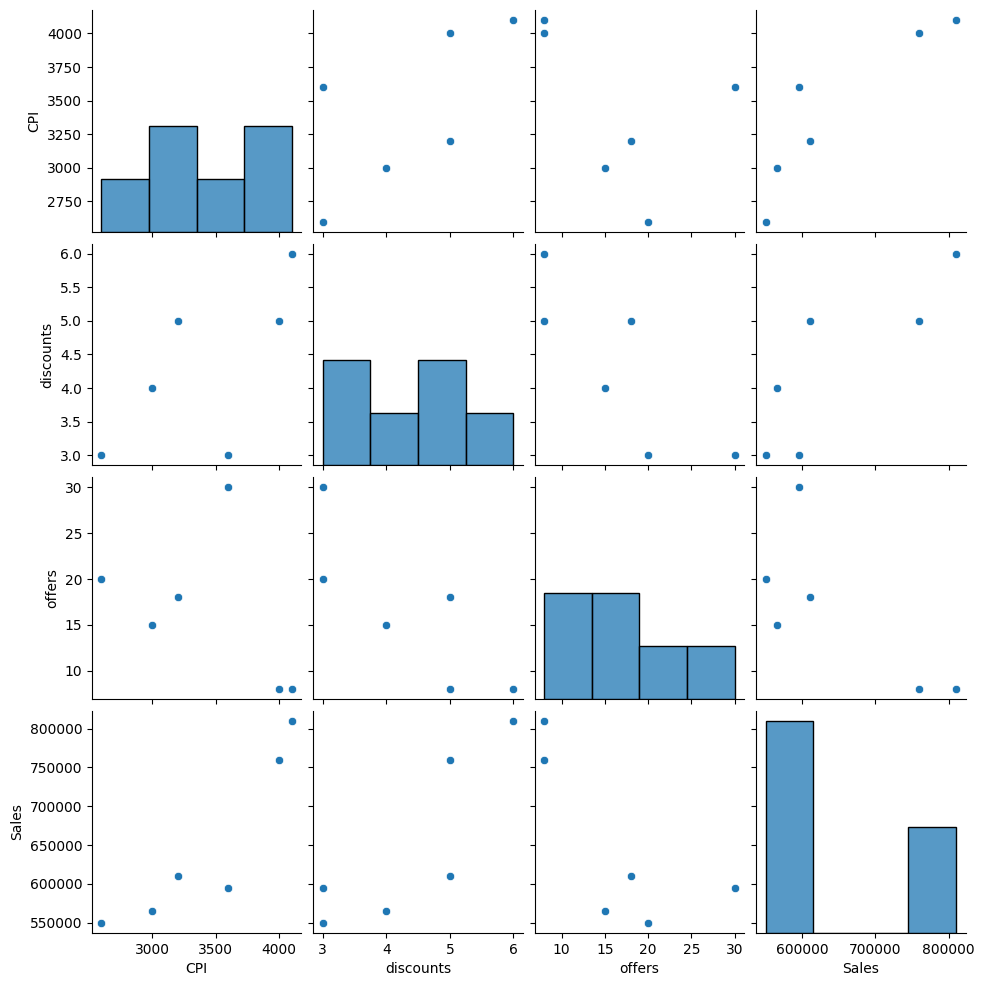

In [7]:
s=p = sns.pairplot(sales_data)

In [9]:
# Fitting the linear model

x = sales_data[['CPI', 'discounts','offers']]
y = sales_data.Sales

In [8]:
sales_data.columns

Index(['CPI', 'discounts', 'offers', 'Sales'], dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)
print(X[1:10])

regr.intercpt
regr.coeff_

[[-0.77633762 -0.30151134 -0.19824558]
 [-0.40369556  0.60302269  0.19824558]
 [ 0.34158855 -1.20604538  1.78421022]
 [ 1.08687266  0.60302269 -1.12339162]
 [ 1.27319369  1.50755672 -1.12339162]]


AttributeError: 'LinearRegression' object has no attribute 'intercpt'

In [13]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))

R squared: 0.9517053277318955


MEAN OF RESIDUALS:

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [15]:
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -5.820766091346741e-11


Very close to zero so all good here

CHECK FOR HOMOSCEDASTICITY:
Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

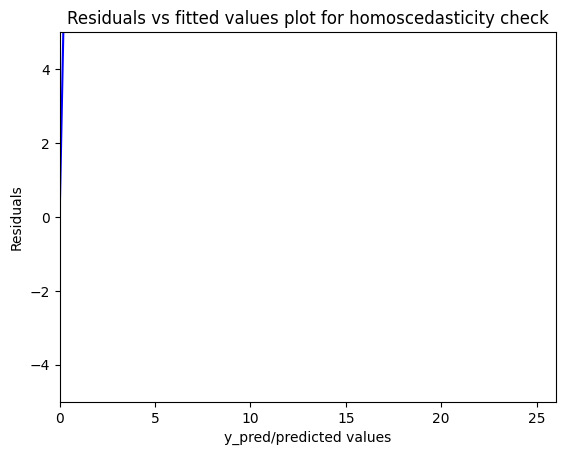

In [23]:
s = sns.scatterplot(y_pred)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-5,5)
plt.xlim(0,26)
s = sns.lineplot([0,26],color='blue')
s = plt.title('Residuals vs fitted values plot for homoscedasticity check')

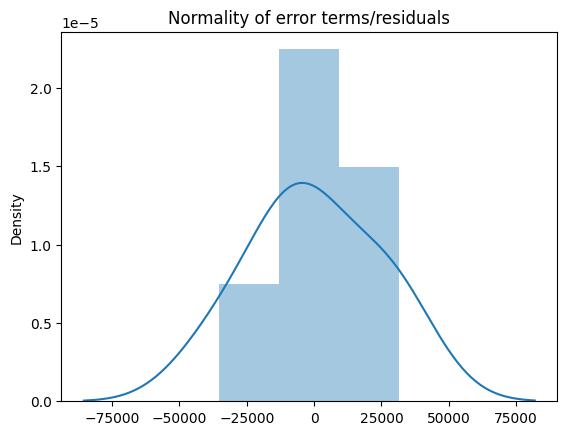

In [24]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

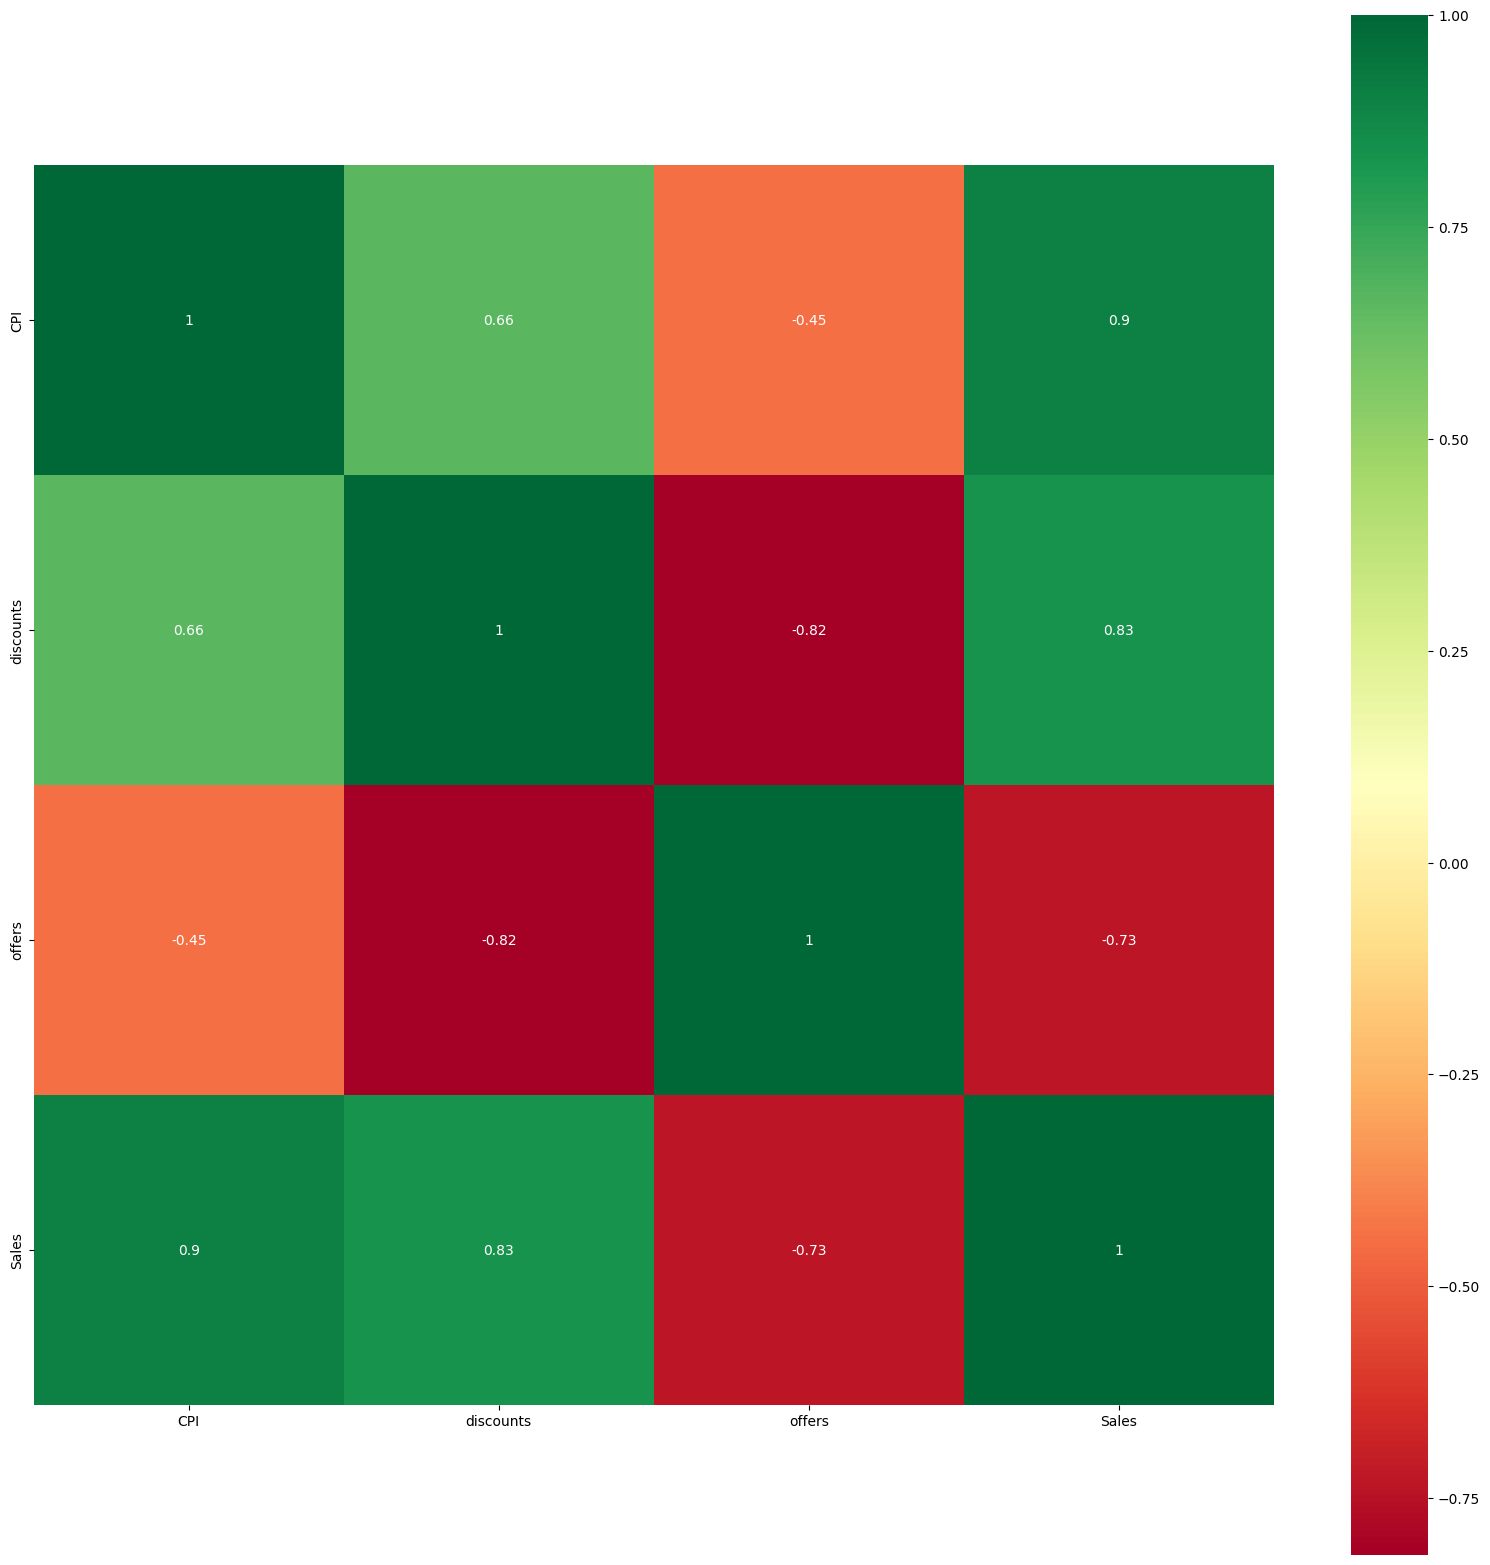

In [26]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(sales_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
sales_data = "Data set.csv"
sales = pd.read_csv(sales_data, na_values = ["?"]).dropna()
mod = smf.ols(formula = "mpg ~ horsepower", data = Auto)
res = mod.fit()
print(res.summary())

ModuleNotFoundError: No module named 'statsmodels'

In [28]:
!pip install statsmodel

ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In [29]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 1.1 MB/s eta 0:00:09
    --------------------------------------- 0.2/9.8 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.4/9.8 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.8 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.8 MB 3.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/9.8 MB 4.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.8 MB 4.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.8 MB 4.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/9.8 MB 4.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 4.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.8 MB 4.4 MB/s eta 0:00:02
   ---------- ------------

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
sales_data = "Data set.csv"
sales = pd.read_csv(sales_data, na_values = ["?"]).dropna()
mod = smf.ols(formula = "CPI ~ discounts", data = sales)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     3.167
Date:                Tue, 30 Jan 2024   Prob (F-statistic):              0.150
Time:                        22:57:30   Log-Likelihood:                -44.477
No. Observations:                   6   AIC:                             92.95
Df Residuals:                       4   BIC:                             92.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2018.1818    810.953      2.489      0.0

C:\Users\San Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mod = smf.ols(formula = "Sales ~  CPI +offers +discounts", data = sales)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     13.14
Date:                Tue, 30 Jan 2024   Prob (F-statistic):             0.0716
Time:                        22:59:58   Log-Likelihood:                -68.476
No. Observations:                   6   AIC:                             145.0
Df Residuals:                       2   BIC:                             144.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.648e+05   1.64e+05      1.613      0.2

C:\Users\San Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
